In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



##Market Segmentation on Vehicle Booking Data In Indian Cities.

### Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Cab_Aggregator_Problem_Dataset.csv")
df

City     Zone  Week Number  Day  4 hour windows        Date  \
0     Hyderabad   Zone 1            1    1  00:00 to 04:00  27-06-2019   
1     Hyderabad   Zone 1            1    1  04:00 to 08.00  27-06-2019   
2     Hyderabad   Zone 1            1    1  08:00 to 12:00  27-06-2019   
3     Hyderabad   Zone 1            1    1  12:00 to 16:00  27-06-2019   
4     Hyderabad   Zone 1            1    1  16:00 to 20:00  27-06-2019   
...         ...      ...          ...  ...             ...         ...   
6715     Jaipur  Zone 10            4    7  04:00 to 08.00  24-07-2019   
6716     Jaipur  Zone 10            4    7  08:00 to 12:00  24-07-2019   
6717     Jaipur  Zone 10            4    7  12:00 to 16:00  24-07-2019   
6718     Jaipur  Zone 10            4    7  16:00 to 20:00  24-07-2019   
6719     Jaipur  Zone 10            4    7  20:00 to 00:00  24-07-2019   

          Time stamp date  Demand  Fulfilment %  Avg. Price  Avg. Trip Size  \
0     27/06/2019 01:51:42    1127            70         170              15   
1     27/06/2019 05:48:02    1157            69         120              11   
2     27/06/2019 08:58:06    1199            66         211              12   
3     27/06/2019 13:24:44    1195            69          82              12   
4     27/06/2019 17:09:23    1157            72         196              10   
...                   ...     ...           ...         ...             ...   
6715  24/07/2019 05:27:13    1976            75          89              14   
6716  24/07/2019 11:39:38    1901            74         176              15   
6717  24/07/2019 12:13:43    2074            67         103              12   
6718  24/07/2019 18:18:03    1971            71         160               7   
6719  24/07/2019 23:21:34    1983            70         207              14   

      Cancellation % (Total)  Driver Cancellation%  Customer Cancellation %  \
0                       11.0                   1.7                      9.3   
1                       10.6                   1.7                      8.9   
2                       30.7                   4.8                     25.9   
3                       37.0                   5.8                     31.2   
4                       33.6                   5.3                     28.3   
...                      ...                   ...                      ...   
6715                    29.4                   5.7                     23.7   
6716                    27.1                   5.2                     21.9   
6717                    22.8                   4.4                     18.4   
6718                    27.2                   5.2                     22.0   
6719                    22.9                   4.4                     18.5   

      Avg. ETA  Unnamed: 15  
0         14.3          NaN  
1         13.4          NaN  
2          5.9          NaN  
3         27.2          NaN  
4         19.8          NaN  
...        ...          ...  
6715      15.8          NaN  
6716      13.5          NaN  
6717      14.1          NaN  
6718      12.6          NaN  
6719      13.9          NaN  

[6720 rows x 16 columns]

### Exploratory Data Analysis

In [ ]:
df.shape

(6720, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6720 entries, 0 to 6719
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     6720 non-null   object 
 1   Zone                     6720 non-null   object 
 2   Week Number              6720 non-null   int64  
 3   Day                      6720 non-null   int64  
 4   4 hour windows           6720 non-null   object 
 5   Date                     6720 non-null   object 
 6   Time stamp date          6720 non-null   object 
 7   Demand                   6720 non-null   int64  
 8   Fulfilment %             6720 non-null   int64  
 9   Avg. Price               6720 non-null   int64  
 10  Avg. Trip Size           6720 non-null   int64  
 11  Cancellation % (Total)   6720 non-null   float64
 12  Driver Cancellation%     6720 non-null   float64
 13  Customer Cancellation %  6720 non-null   float64
 14  Avg. ETA                

In [ ]:
df.describe()

Week Number          Day       Demand  Fulfilment %   Avg. Price  \
count  6720.000000  6720.000000  6720.000000   6720.000000  6720.000000   
mean      2.500000     4.142857  1751.590179     70.378125   155.106399   
std       1.118117     1.958904   445.137840      2.957158    44.664843   
min       1.000000     1.000000   350.000000     65.000000    50.000000   
25%       1.750000     2.000000  1725.000000     68.000000   102.000000   
50%       2.500000     4.000000  1968.000000     70.000000   170.000000   
75%       3.250000     6.000000  2033.000000     73.000000   195.000000   
max       4.000000     7.000000  2100.000000     75.000000   215.000000   

       Avg. Trip Size  Cancellation % (Total)  Driver Cancellation%  \
count     6720.000000             6720.000000           6720.000000   
mean        10.863542               28.000685              5.089583   
std          4.056306                6.664366              1.006142   
min          1.000000                8.000000              1.300000   
25%          8.000000               23.500000              4.500000   
50%         11.000000               26.600000              5.000000   
75%         14.000000               31.900000              5.800000   
max         18.000000               49.900000              7.800000   

       Customer Cancellation %     Avg. ETA  Unnamed: 15  
count              6720.000000  6720.000000          0.0  
mean                 22.916354    12.935863          NaN  
std                   5.760235     5.187105          NaN  
min                   6.800000     0.100000          NaN  
25%                  19.000000    10.400000          NaN  
50%                  21.600000    13.000000          NaN  
75%                  26.000000    15.400000          NaN  
max                  42.100000    31.000000          NaN

In [ ]:
df.isnull().sum()

City                          0
Zone                          0
Week Number                   0
Day                           0
4 hour windows                0
Date                          0
Time stamp date               0
Demand                        0
Fulfilment %                  0
Avg. Price                    0
Avg. Trip Size                0
Cancellation % (Total)        0
Driver Cancellation%          0
Customer Cancellation %       0
Avg. ETA                      0
Unnamed: 15                6720
dtype: int64

In [ ]:
df=df.drop(['Unnamed: 15'], axis=1)

In [ ]:
df.isnull().sum()

City                       0
Zone                       0
Week Number                0
Day                        0
4 hour windows             0
Date                       0
Time stamp date            0
Demand                     0
Fulfilment %               0
Avg. Price                 0
Avg. Trip Size             0
Cancellation % (Total)     0
Driver Cancellation%       0
Customer Cancellation %    0
Avg. ETA                   0
dtype: int64

In [ ]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['City', 'Zone', 'Week Number', 'Day', '4 hour windows', 'Date',
       'Time stamp date', 'Demand', 'Fulfilment %', 'Avg. Price',
       'Avg. Trip Size', 'Cancellation % (Total)', 'Driver Cancellation%',
       'Customer Cancellation %', 'Avg. ETA'],
      dtype='object')

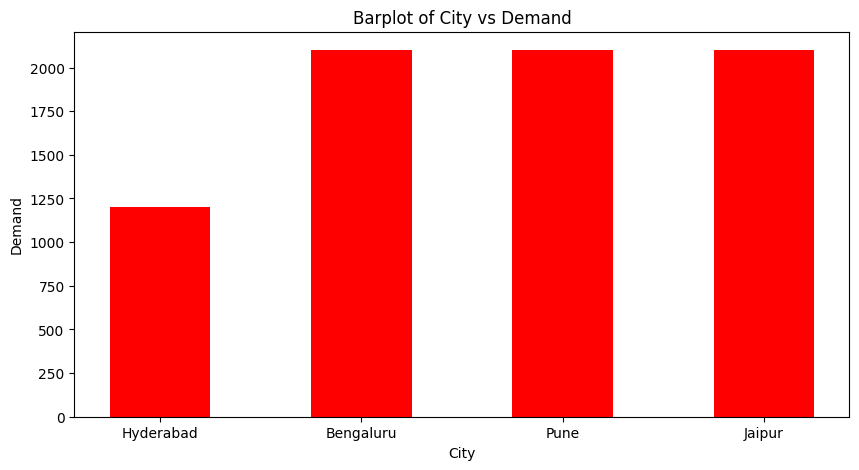

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df['City'], df['Demand'],color='red', width=0.5)
plt.title('Barplot of City vs Demand')
plt.xlabel('City')
plt.ylabel('Demand')
plt.show()

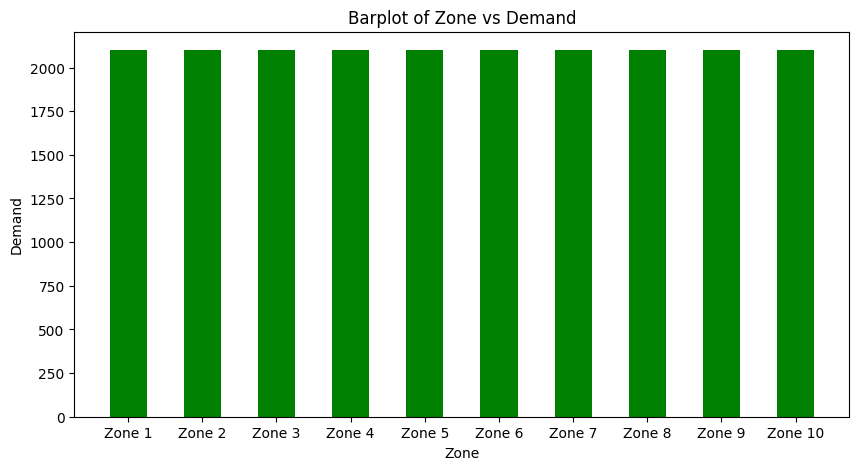

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df['Zone'], df['Demand'],color='green', width=0.5)
plt.title('Barplot of Zone vs Demand')
plt.xlabel('Zone')
plt.ylabel('Demand')
plt.show()

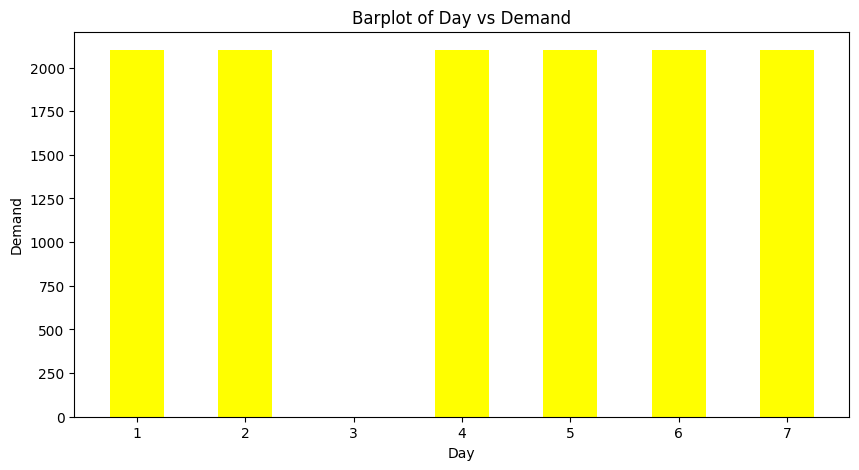

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df['Day'], df['Demand'],color='yellow', width=0.5)
plt.title('Barplot of Day vs Demand')
plt.xlabel('Day')
plt.ylabel('Demand')
plt.show()

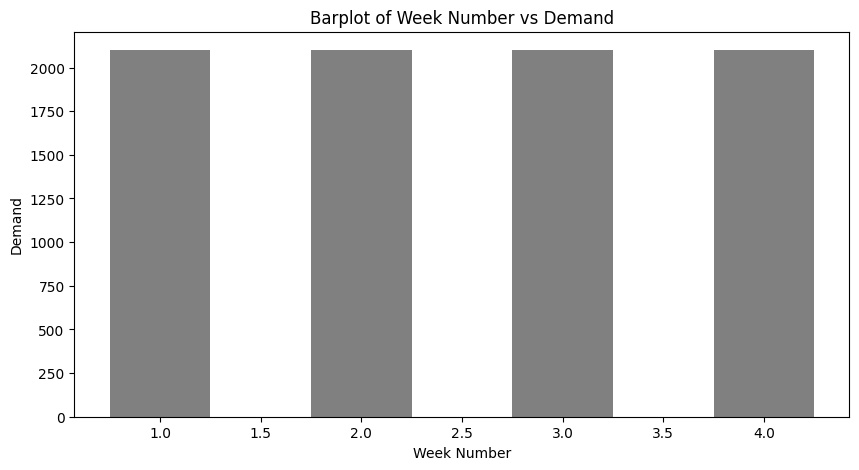

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df['Week Number'], df['Demand'],color='grey', width=0.5)
plt.title('Barplot of Week Number vs Demand')
plt.xlabel('Week Number')
plt.ylabel('Demand')
plt.show()

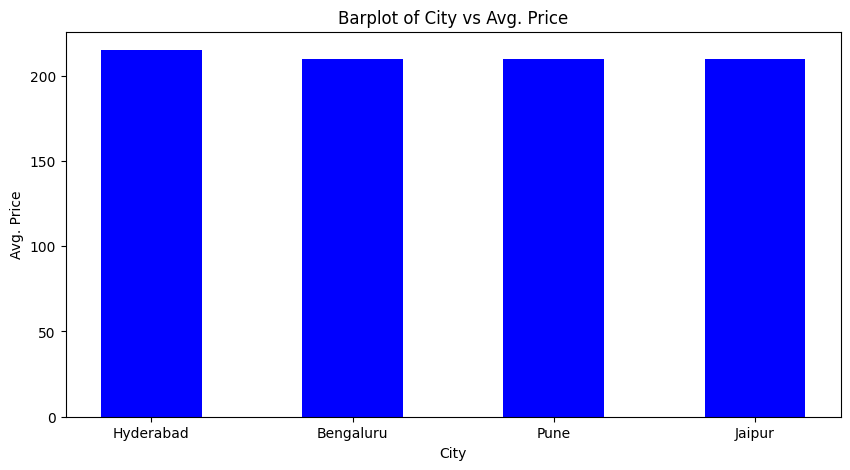

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df['City'], df['Avg. Price'],color='blue', width=0.5)
plt.title('Barplot of City vs Avg. Price')
plt.xlabel('City')
plt.ylabel('Avg. Price')
plt.show()

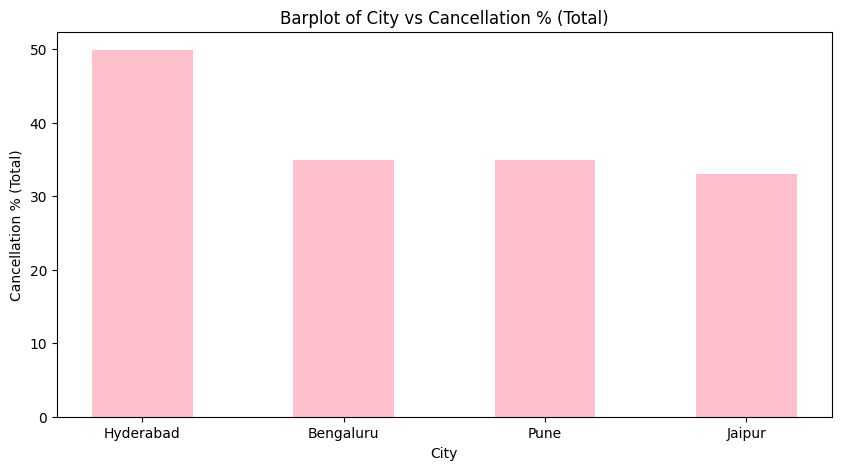

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df['City'], df['Cancellation % (Total)'],color='pink', width=0.5)
plt.title('Barplot of City vs Cancellation % (Total)')
plt.xlabel('City')
plt.ylabel('Cancellation % (Total)')
plt.show()

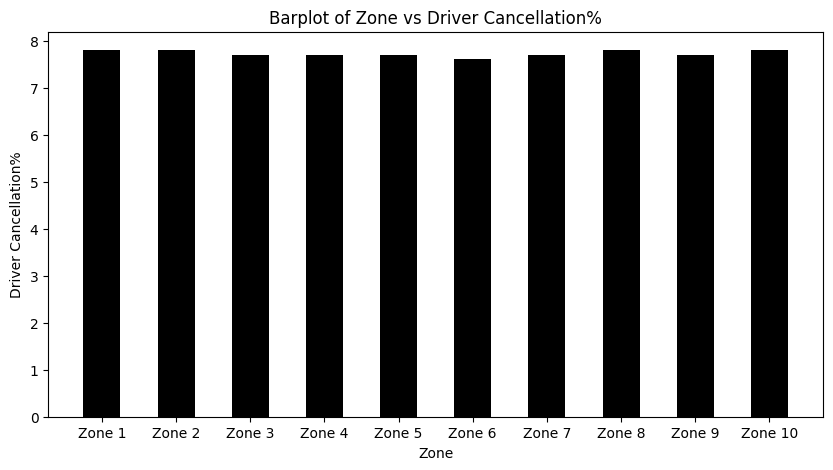

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df['Zone'], df['Driver Cancellation%'],color='black', width=0.5)
plt.title('Barplot of Zone vs Driver Cancellation%')
plt.xlabel('Zone')
plt.ylabel('Driver Cancellation%')
plt.show()

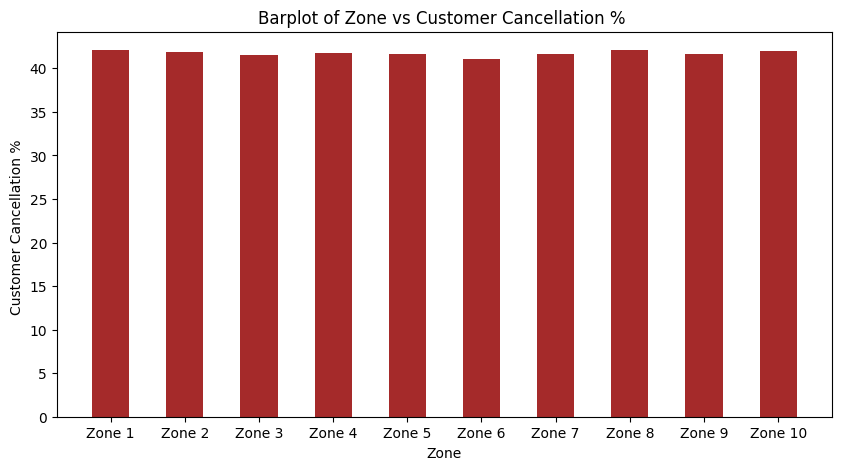

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df['Zone'], df['Customer Cancellation %'],color='brown', width=0.5)
plt.title('Barplot of Zone vs Customer Cancellation % ')
plt.xlabel('Zone')
plt.ylabel('Customer Cancellation % ')
plt.show()

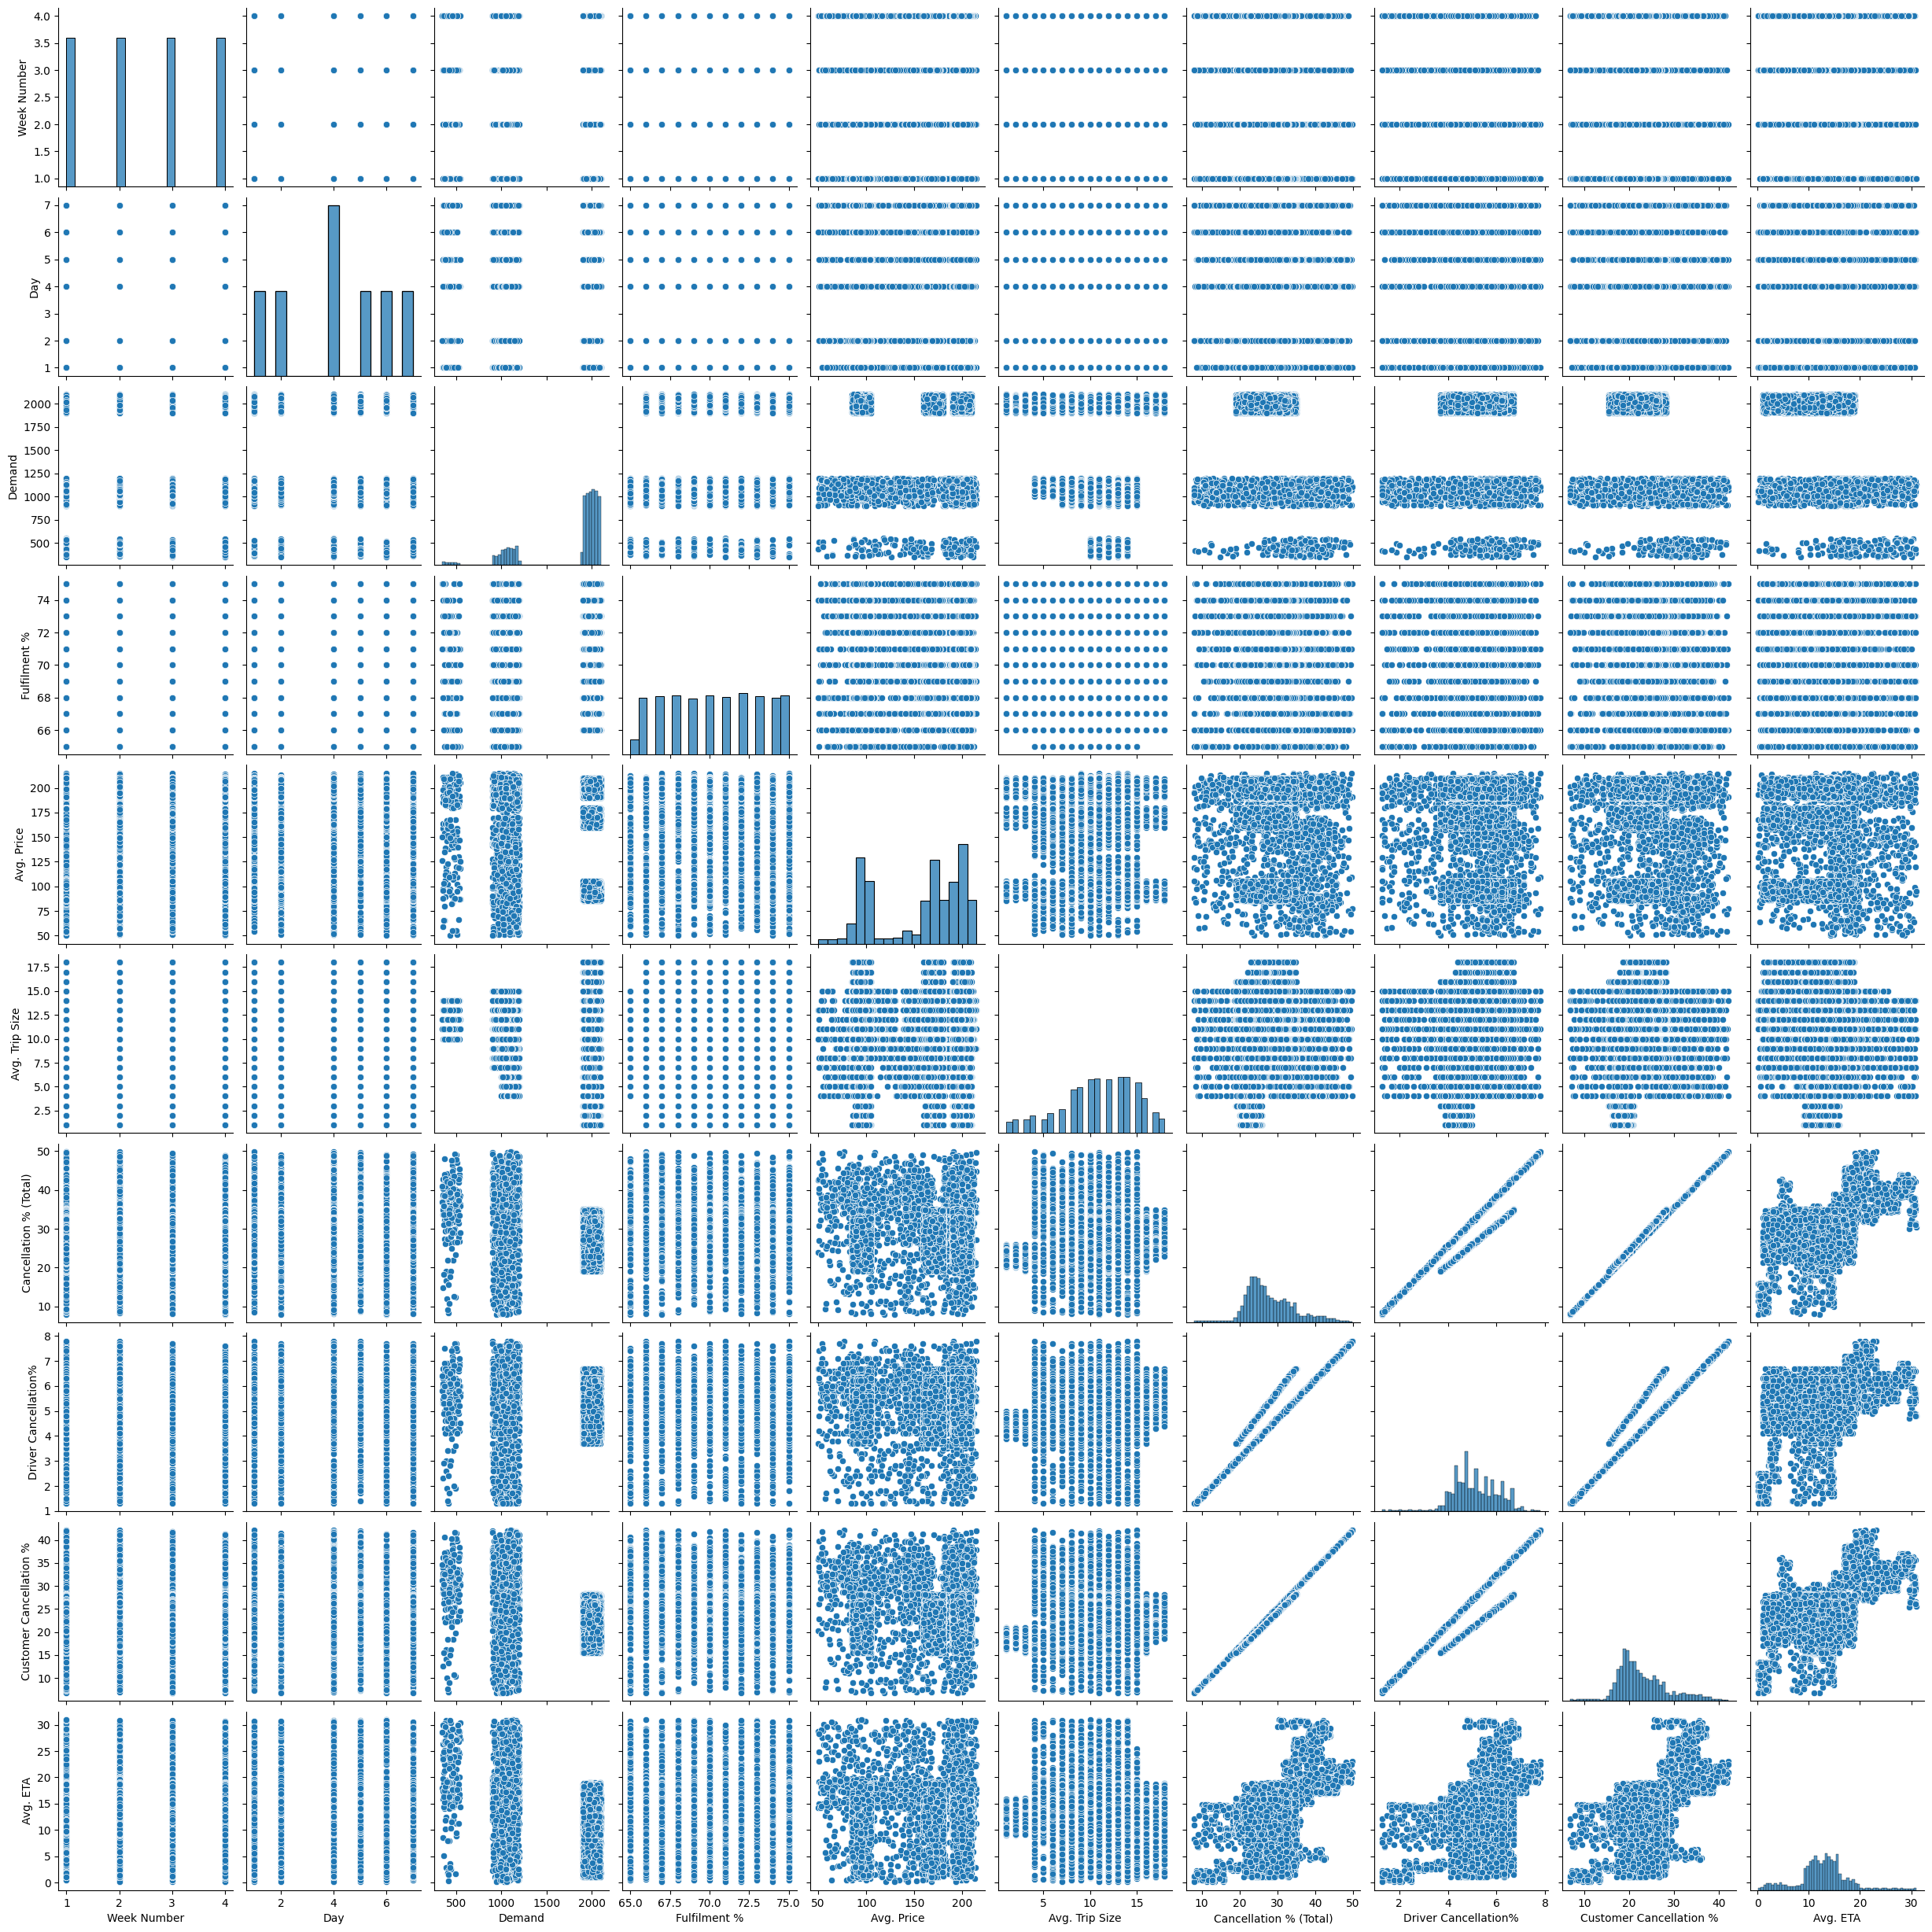

In [ ]:
sns.pairplot(df)

### Feature Engineering

#### Label Encoding

In [ ]:
# Create a list of all categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Convert all categorical columns to numerical using the LabelEncoder() function
from sklearn.preprocessing import LabelEncoder

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

#### Kernel Density Estimation

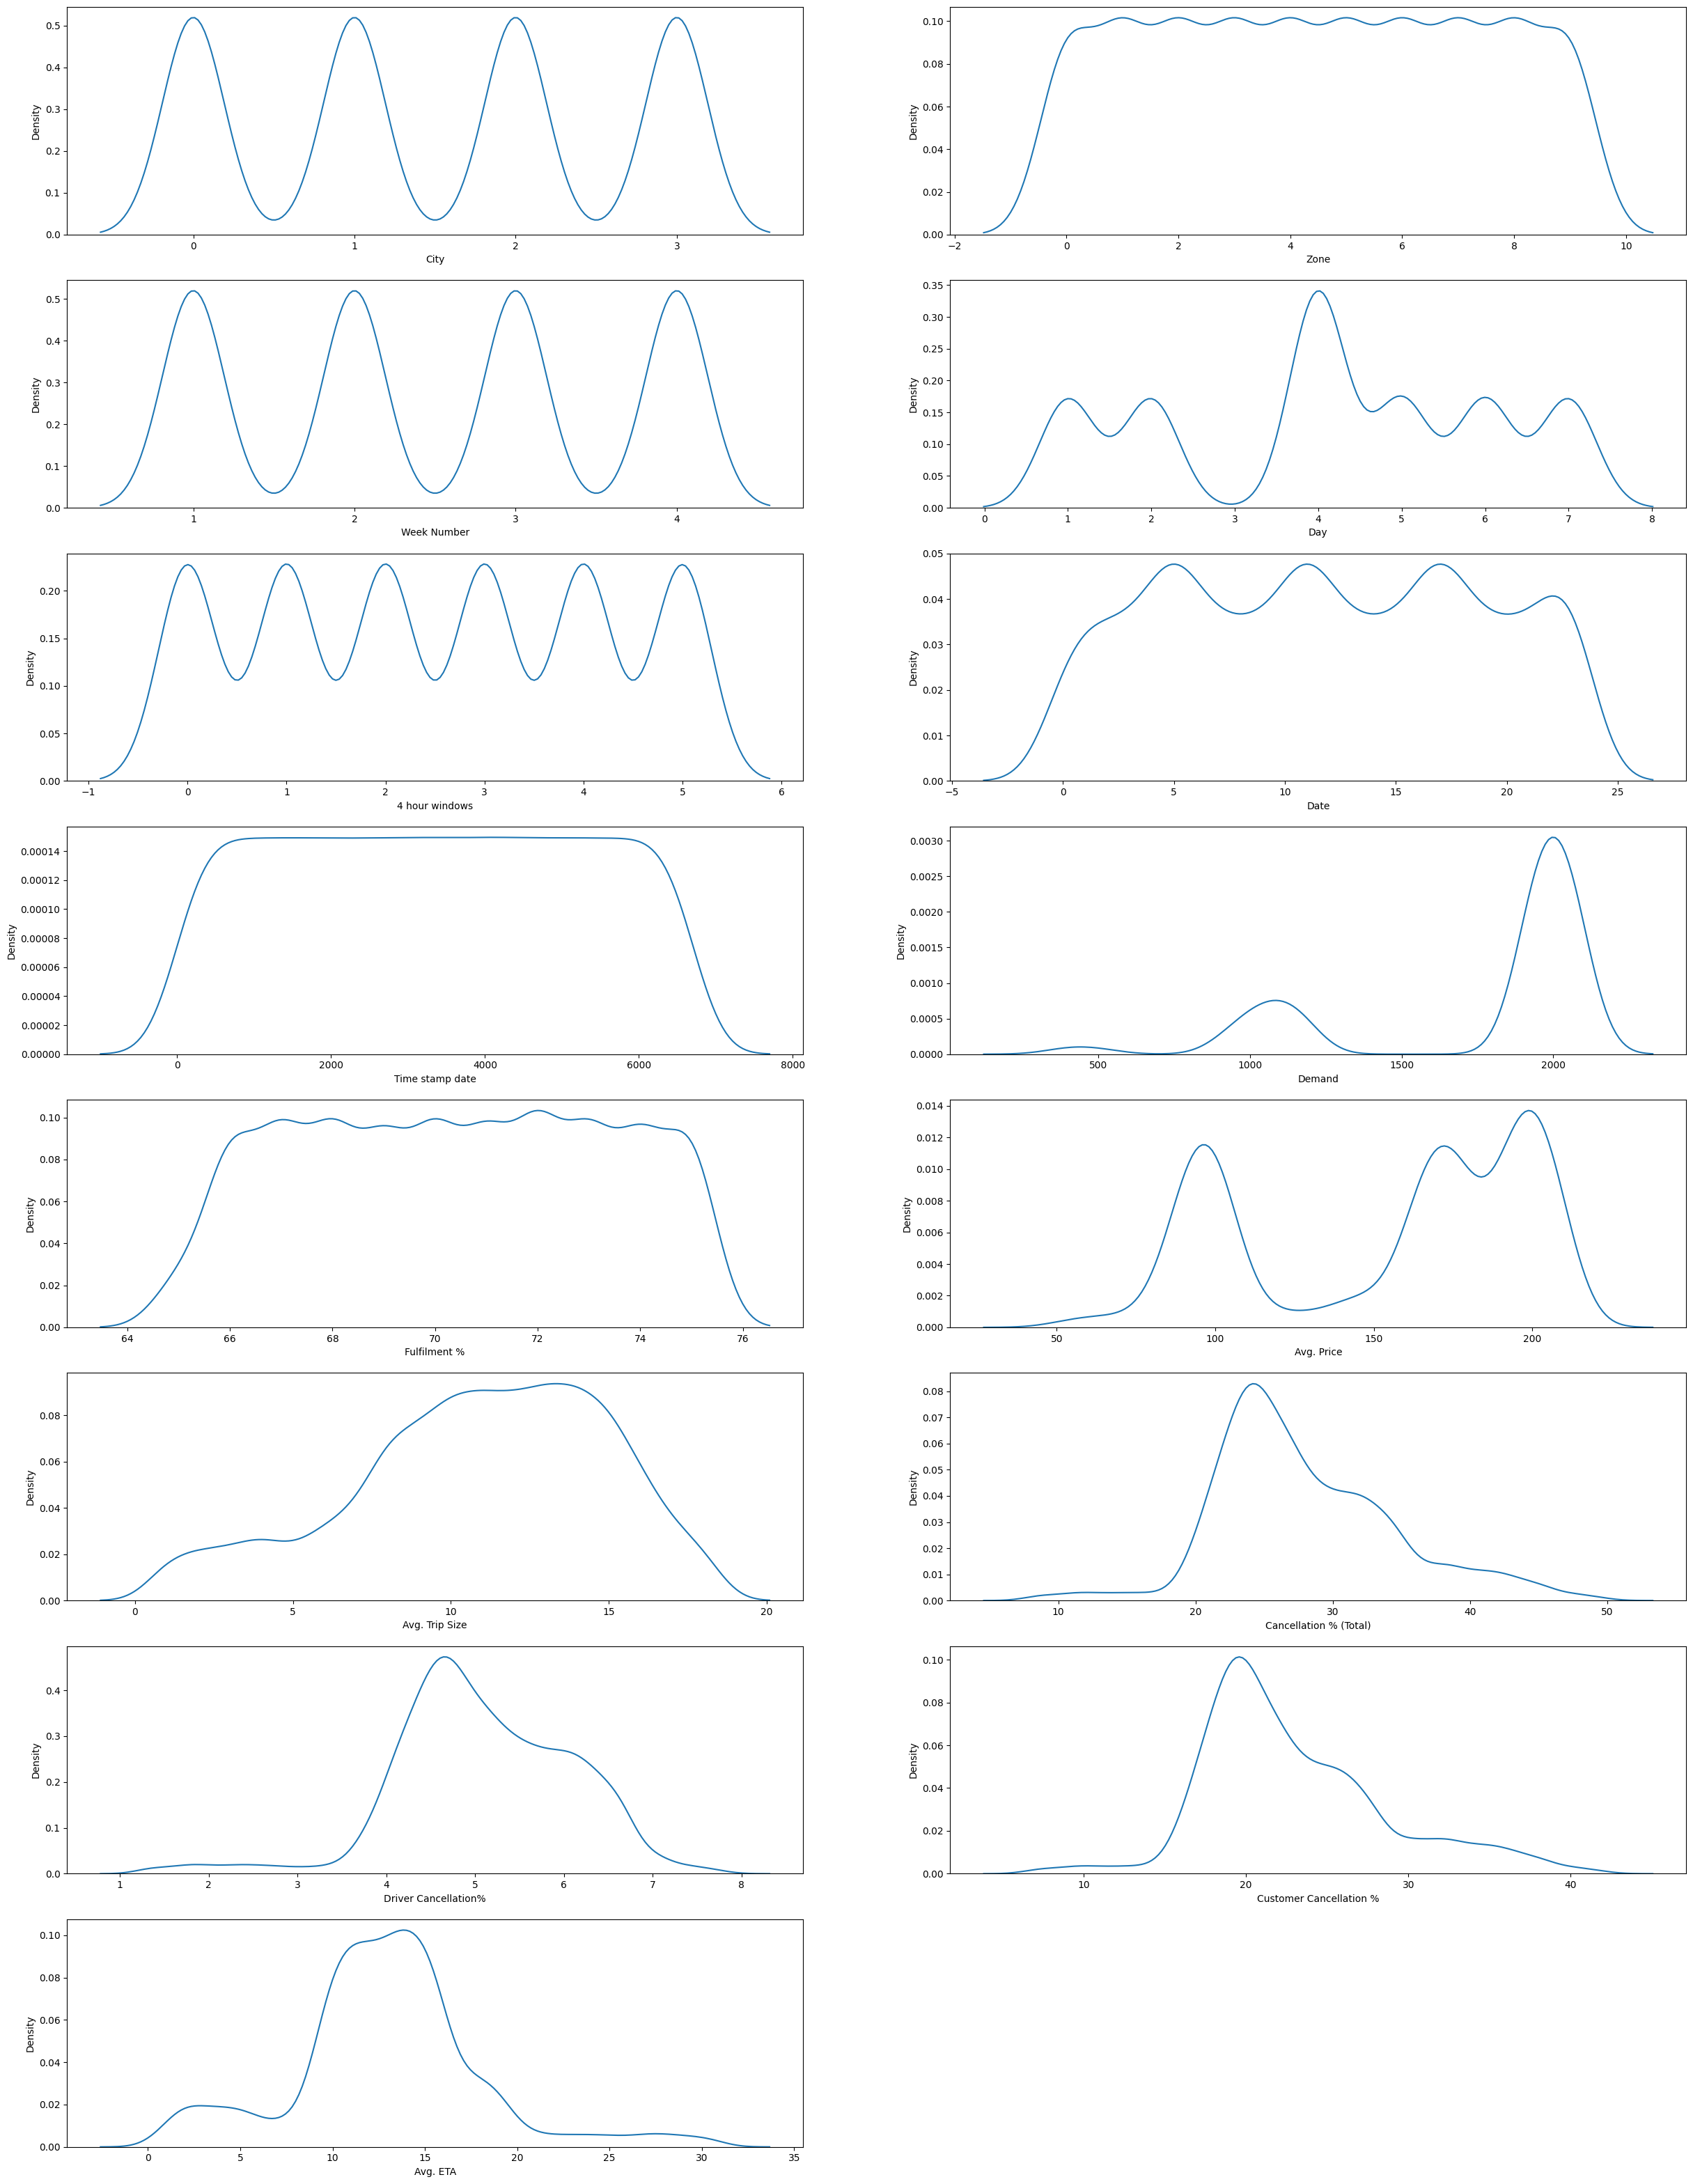

In [ ]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)

plt.show()

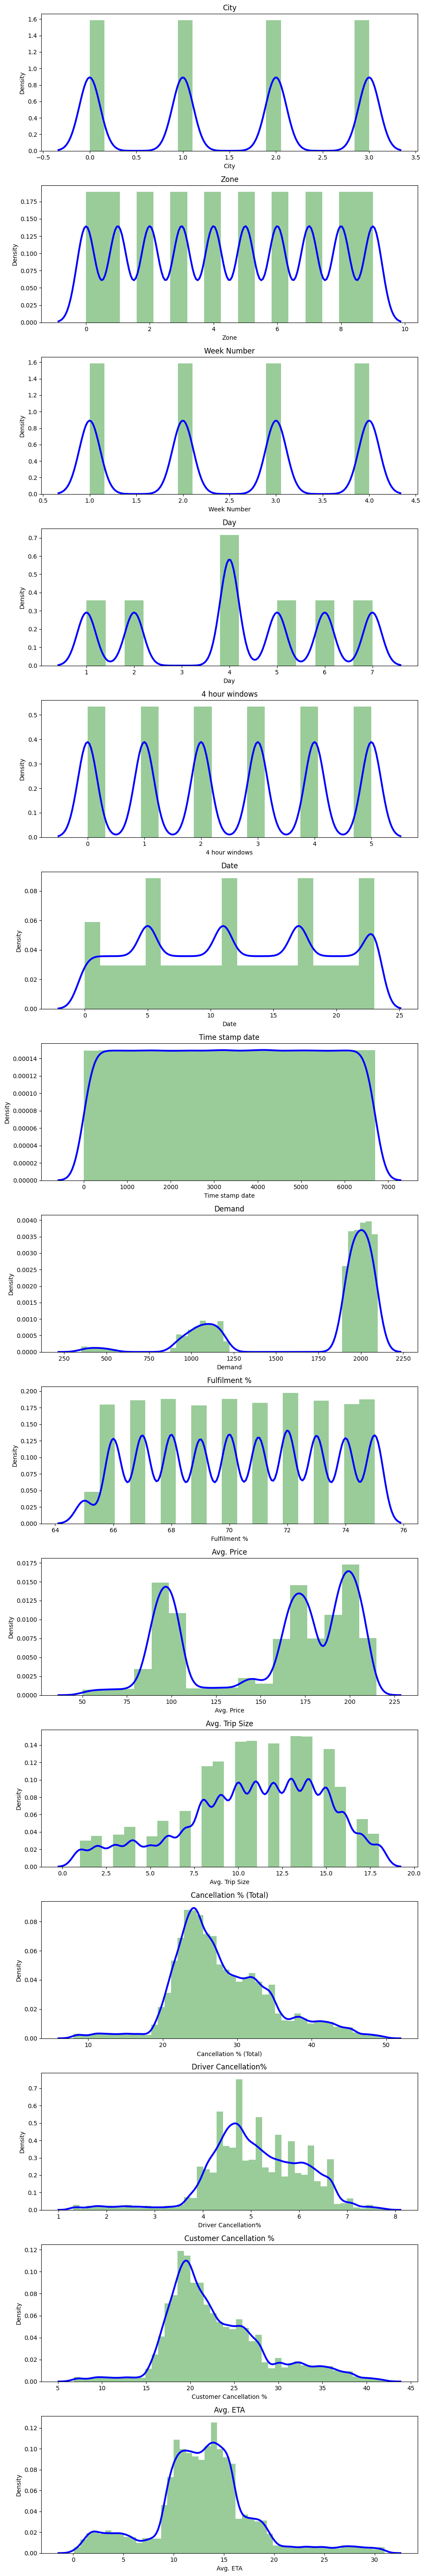

In [ ]:
plt.figure(figsize=(10,60))
for i in range(0,15):
    plt.subplot(15,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

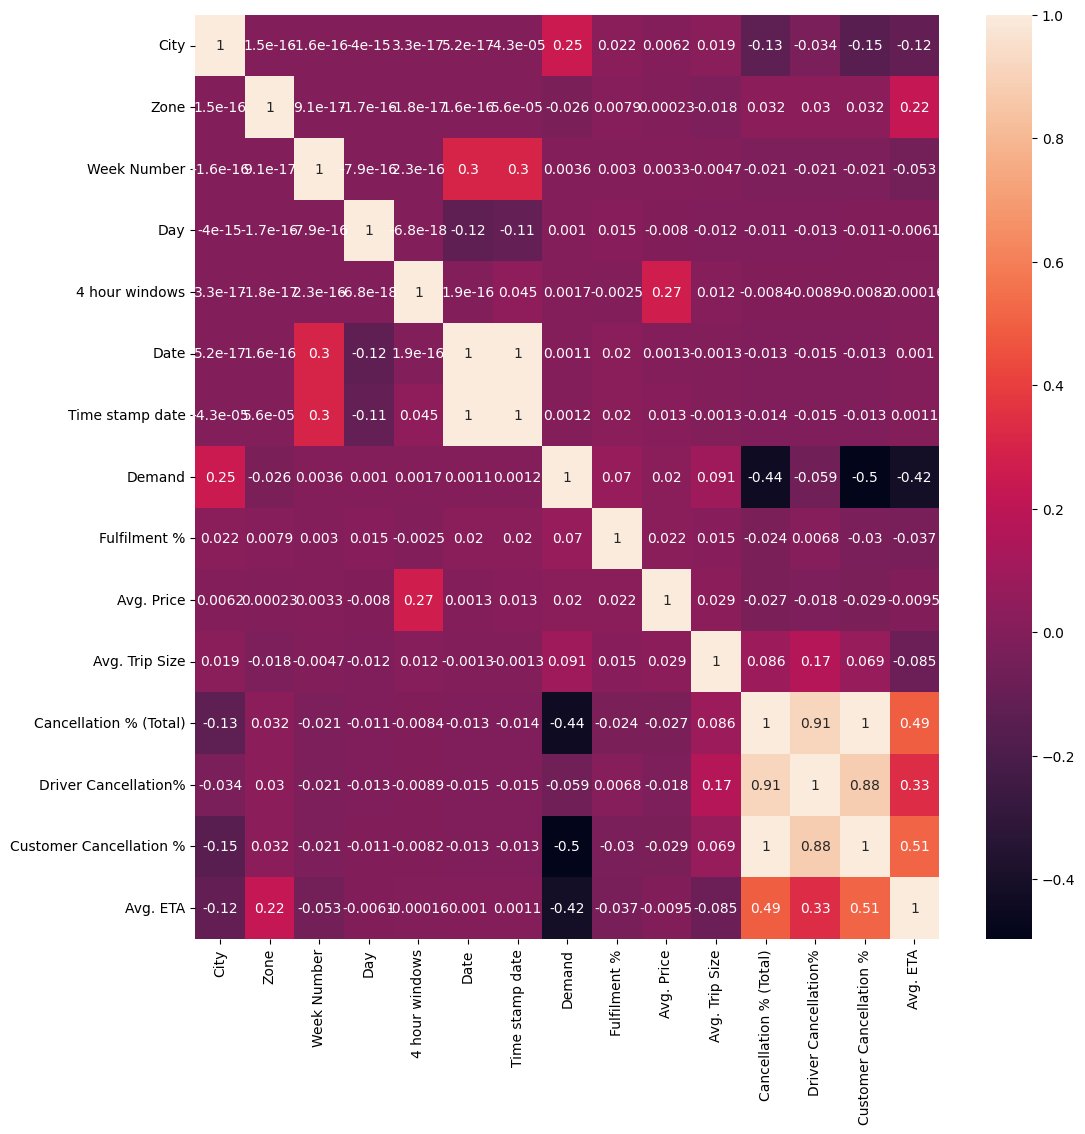

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scaled_df = scalar.fit_transform(df)

### Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

PCA1      PCA2
0    -3.646888 -1.299288
1    -3.810312 -1.300056
2     0.232356 -1.466395
3     3.134952 -1.574519
4     1.793538 -1.620947
...        ...       ...
6715  0.324614 -1.770845
6716 -0.384137 -1.811041
6717 -1.428158 -1.719647
6718 -0.532544 -1.835720
6719 -1.429263 -1.851108

[6720 rows x 2 columns]

### K-means Clustering Algorithm

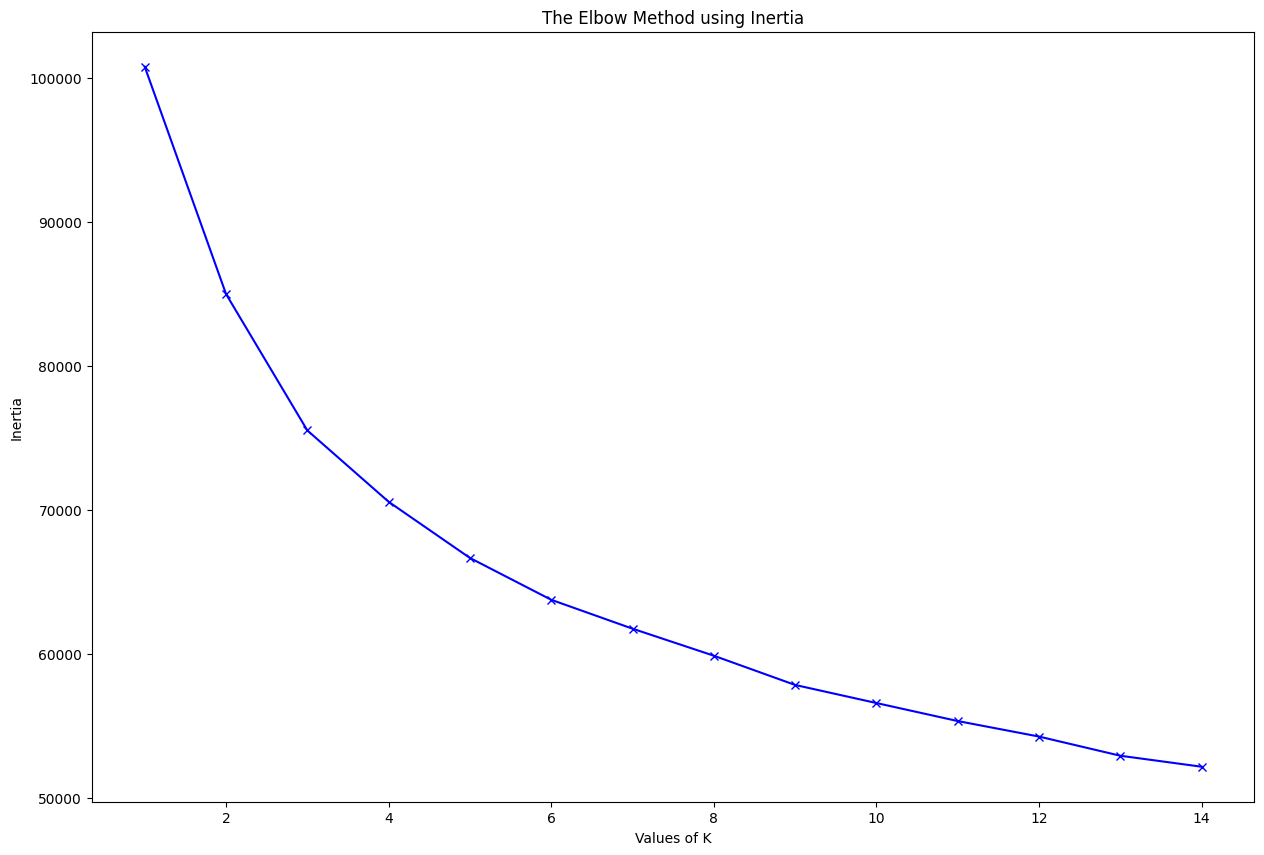

In [ ]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.figure(figsize=(15,10))
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
kmeans_model=KMeans(3)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_model.labels_})], axis=1)

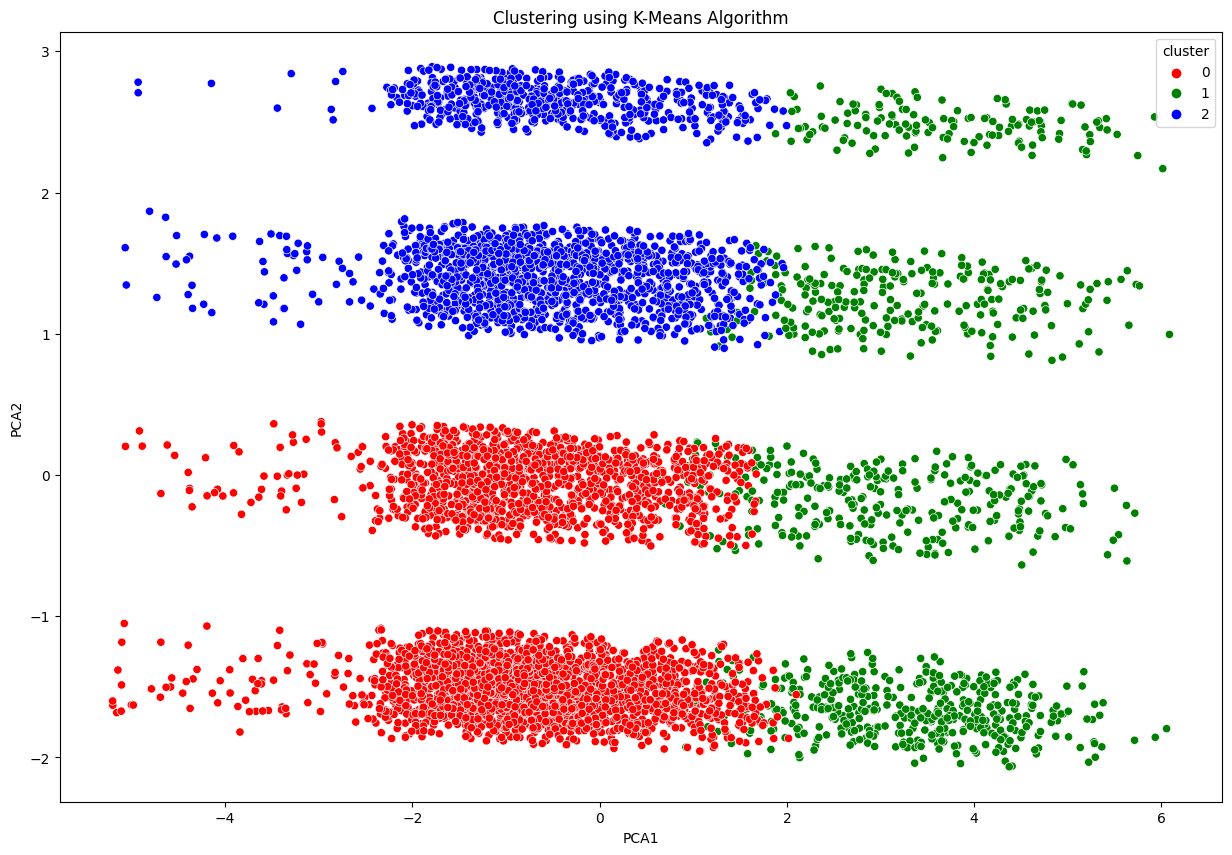

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [ ]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

City      Zone Week Number       Day 4 hour windows       Date  \
0  1.602732  4.451073    2.955394  3.850293       2.505436  16.186507   
1  0.994648  4.792150    2.460303  4.124888       2.486173  11.855486   
2  1.598410  4.424453    1.710239  4.674453       2.498012   4.139662   

  Time stamp date       Demand Fulfilment %  Avg. Price Avg. Trip Size  \
0     4555.575969  1905.060496    70.486200  155.454976      11.003903   
1     3351.446922  1003.583408    69.933095  152.855486      10.063336   
2     1208.619781  1894.740060    70.433400  155.739066      11.059145   

  Cancellation % (Total) Driver Cancellation% Customer Cancellation %  \
0              25.728910             4.875216               20.860106   
1              38.922658             6.101963               32.824799   
2              25.965557             4.907704               21.061680   

    Avg. ETA  
0  11.497519  
1  20.078947  
2  11.520328

In [ ]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

City  Zone  Week Number  Day  4 hour windows  Date  Time stamp date  \
0        1     0            1    1               0    21             5765   
1        1     0            1    1               1    21             5809   
2        1     0            1    1               2    21             5840   
3        1     0            1    1               3    21             5882   
4        1     0            1    1               4    21             5922   
...    ...   ...          ...  ...             ...   ...              ...   
6715     2     1            4    7               1    20             5562   
6716     2     1            4    7               2    20             5623   
6717     2     1            4    7               3    20             5630   
6718     2     1            4    7               4    20             5691   
6719     2     1            4    7               5    20             5742   

      Demand  Fulfilment %  Avg. Price  Avg. Trip Size  \
0       1127            70         170              15   
1       1157            69         120              11   
2       1199            66         211              12   
3       1195            69          82              12   
4       1157            72         196              10   
...      ...           ...         ...             ...   
6715    1976            75          89              14   
6716    1901            74         176              15   
6717    2074            67         103              12   
6718    1971            71         160               7   
6719    1983            70         207              14   

      Cancellation % (Total)  Driver Cancellation%  Customer Cancellation %  \
0                       11.0                   1.7                      9.3   
1                       10.6                   1.7                      8.9   
2                       30.7                   4.8                     25.9   
3                       37.0                   5.8                     31.2   
4                       33.6                   5.3                     28.3   
...                      ...                   ...                      ...   
6715                    29.4                   5.7                     23.7   
6716                    27.1                   5.2                     21.9   
6717                    22.8                   4.4                     18.4   
6718                    27.2                   5.2                     22.0   
6719                    22.9                   4.4                     18.5   

      Avg. ETA  Cluster  
0         14.3        0  
1         13.4        0  
2          5.9        0  
3         27.2        1  
4         19.8        1  
...        ...      ...  
6715      15.8        0  
6716      13.5        0  
6717      14.1        0  
6718      12.6        0  
6719      13.9        0  

[6720 rows x 16 columns]

In [ ]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

City  Zone  Week Number  Day  4 hour windows  Date  Time stamp date  \
0        1     0            1    1               0    21             5765   
1        1     0            1    1               1    21             5809   
2        1     0            1    1               2    21             5840   
5        1     0            1    1               5    21             5950   
6        1     0            1    2               0    22             6011   
...    ...   ...          ...  ...             ...   ...              ...   
6715     2     1            4    7               1    20             5562   
6716     2     1            4    7               2    20             5623   
6717     2     1            4    7               3    20             5630   
6718     2     1            4    7               4    20             5691   
6719     2     1            4    7               5    20             5742   

      Demand  Fulfilment %  Avg. Price  Avg. Trip Size  \
0       1127            70         170              15   
1       1157            69         120              11   
2       1199            66         211              12   
5       1069            69         188              13   
6       1094            68         168              12   
...      ...           ...         ...             ...   
6715    1976            75          89              14   
6716    1901            74         176              15   
6717    2074            67         103              12   
6718    1971            71         160               7   
6719    1983            70         207              14   

      Cancellation % (Total)  Driver Cancellation%  Customer Cancellation %  \
0                       11.0                   1.7                      9.3   
1                       10.6                   1.7                      8.9   
2                       30.7                   4.8                     25.9   
5                       11.6                   1.8                      9.8   
6                       18.2                   2.8                     15.3   
...                      ...                   ...                      ...   
6715                    29.4                   5.7                     23.7   
6716                    27.1                   5.2                     21.9   
6717                    22.8                   4.4                     18.4   
6718                    27.2                   5.2                     22.0   
6719                    22.9                   4.4                     18.5   

      Avg. ETA  Cluster  
0         14.3        0  
1         13.4        0  
2          5.9        0  
5         14.8        0  
6          2.2        0  
...        ...      ...  
6715      15.8        0  
6716      13.5        0  
6717      14.1        0  
6718      12.6        0  
6719      13.9        0  

[3587 rows x 16 columns]

In [ ]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

City  Zone  Week Number  Day  4 hour windows  Date  Time stamp date  \
3        1     0            1    1               3    21             5882   
4        1     0            1    1               4    21             5922   
9        1     0            1    2               3    22             6108   
10       1     0            1    2               4    22             6182   
12       1     0            1    4               0    23             6296   
...    ...   ...          ...  ...             ...   ...              ...   
2901     0     1            3    1               3     9             2539   
2922     0     1            3    5               0    12             3390   
4422     3     6            3    4               0    11             2921   
4495     3     8            3    1               1     9             2476   
4516     3     8            3    4               4    11             3262   

      Demand  Fulfilment %  Avg. Price  Avg. Trip Size  \
3       1195            69          82              12   
4       1157            72         196              10   
9       1190            66          90               9   
10      1173            75         194              14   
12      1177            75         151              13   
...      ...           ...         ...             ...   
2901    2003            74          91               9   
2922    2057            66         199               8   
4422    1903            67         198              14   
4495    2080            75          98               8   
4516    1959            69         170              18   

      Cancellation % (Total)  Driver Cancellation%  Customer Cancellation %  \
3                       37.0                   5.8                     31.2   
4                       33.6                   5.3                     28.3   
9                       37.3                   5.8                     31.5   
10                      45.1                   7.1                     38.1   
12                      34.7                   5.4                     29.3   
...                      ...                   ...                      ...   
2901                    34.1                   6.6                     27.5   
2922                    35.0                   6.7                     28.3   
4422                    34.8                   6.7                     28.1   
4495                    34.7                   6.7                     28.1   
4516                    34.5                   6.6                     27.9   

      Avg. ETA  Cluster  
3         27.2        1  
4         19.8        1  
9         22.9        1  
10        17.9        1  
12        12.8        1  
...        ...      ...  
2901      15.5        1  
2922      12.5        1  
4422      15.1        1  
4495      18.9        1  
4516      18.8        1  

[1121 rows x 16 columns]

In [ ]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

City  Zone  Week Number  Day  4 hour windows  Date  Time stamp date  \
26       1     0            1    5               2     0              116   
27       1     0            1    5               3     0              147   
28       1     0            1    5               4     0              180   
31       1     0            1    6               1     1              288   
32       1     0            1    6               2     1              357   
...    ...   ...          ...  ...             ...   ...              ...   
5875     2     1            2    7               1     8             2217   
5876     2     1            2    7               2     8             2272   
5877     2     1            2    7               3     8             2291   
5878     2     1            2    7               4     8             2349   
5879     2     1            2    7               5     8             2385   

      Demand  Fulfilment %  Avg. Price  Avg. Trip Size  \
26      1061            74         209              15   
27      1023            70         121              11   
28      1133            68         190               8   
31      1069            66         139               6   
32      1069            71         204               9   
...      ...           ...         ...             ...   
5875    1968            71          94              12   
5876    2082            69         175              10   
5877    1933            74          93              14   
5878    2093            72         178              10   
5879    1982            72         201               6   

      Cancellation % (Total)  Driver Cancellation%  Customer Cancellation %  \
26                      27.0                   4.2                     22.8   
27                      31.5                   4.9                     26.6   
28                      30.3                   4.7                     25.6   
31                      14.3                   2.2                     12.1   
32                      20.6                   3.2                     17.3   
...                      ...                   ...                      ...   
5875                    31.7                   6.1                     25.6   
5876                    32.0                   6.2                     25.8   
5877                    21.1                   4.1                     17.0   
5878                    26.7                   5.1                     21.6   
5879                    32.6                   6.3                     26.4   

      Avg. ETA  Cluster  
26        15.6        2  
27        16.5        2  
28        15.6        2  
31        14.1        2  
32         3.1        2  
...        ...      ...  
5875      14.6        2  
5876      14.9        2  
5877      13.9        2  
5878      14.5        2  
5879      13.1        2  

[2012 rows x 16 columns]

<Axes: xlabel='Cluster', ylabel='count'>

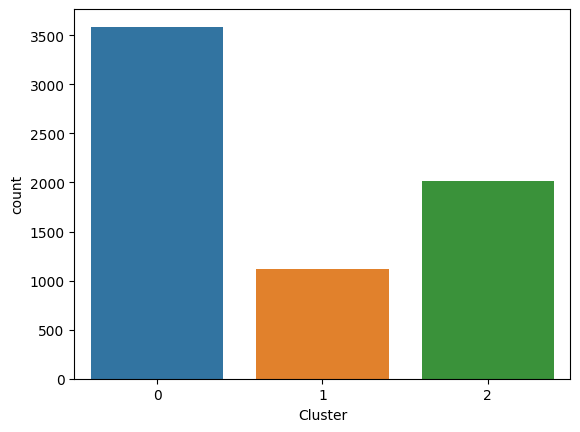

In [ ]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df)

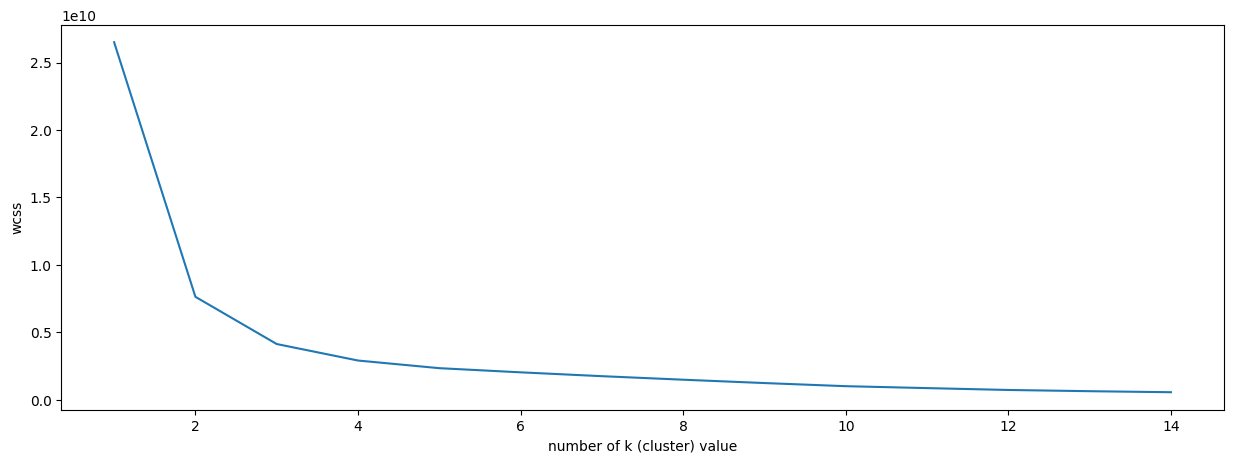

In [ ]:
from sklearn.cluster import KMeans
#define k value
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# the best value is elbow value. It's 5.
plt.figure(figsize=(15,5))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

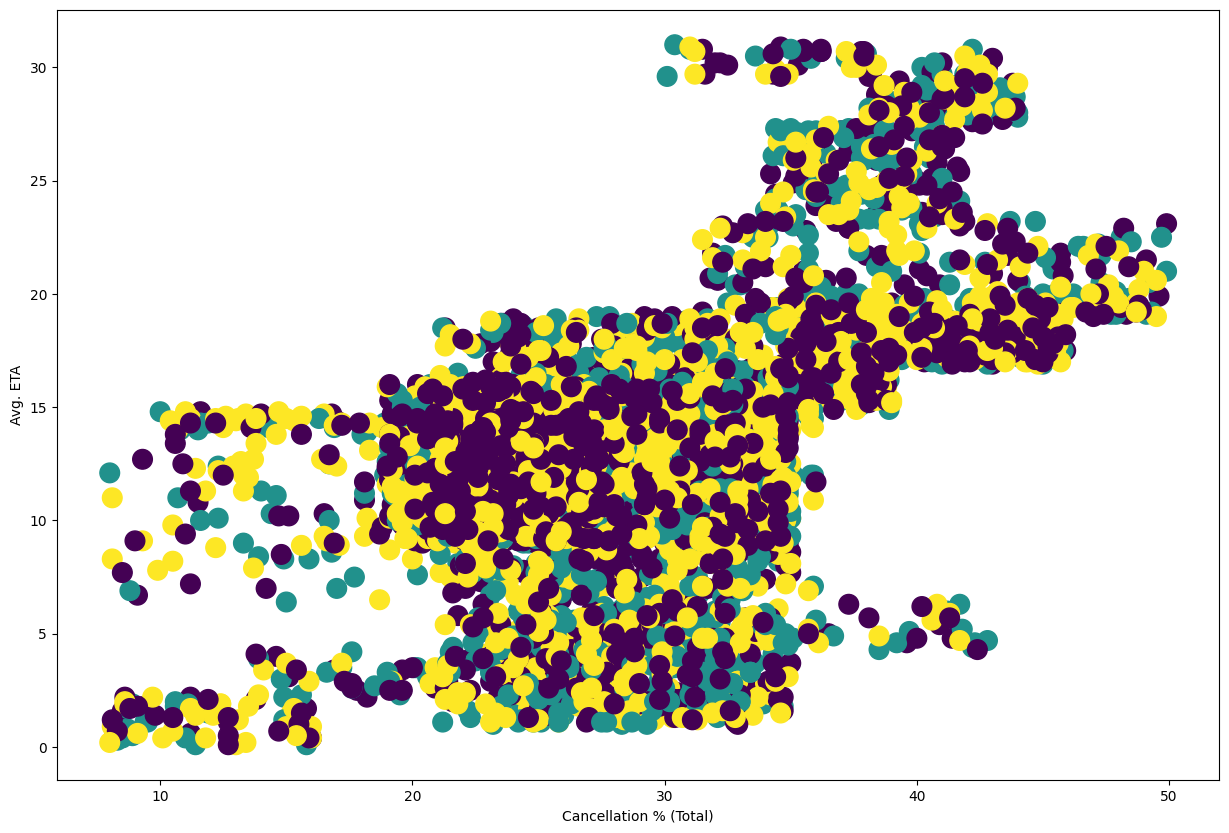

In [ ]:
#create model
kmeans = KMeans(n_clusters=3)
data_predict = kmeans.fit_predict(df)

plt.figure(figsize=(15,10))
plt.scatter( x = 'Cancellation % (Total)' ,y = 'Avg. ETA' , data = df , c = data_predict , s = 200 )
plt.xlabel("Cancellation % (Total)")
plt.ylabel("Avg. ETA")
plt.show()

### Hierarchical Clustering Algorithm

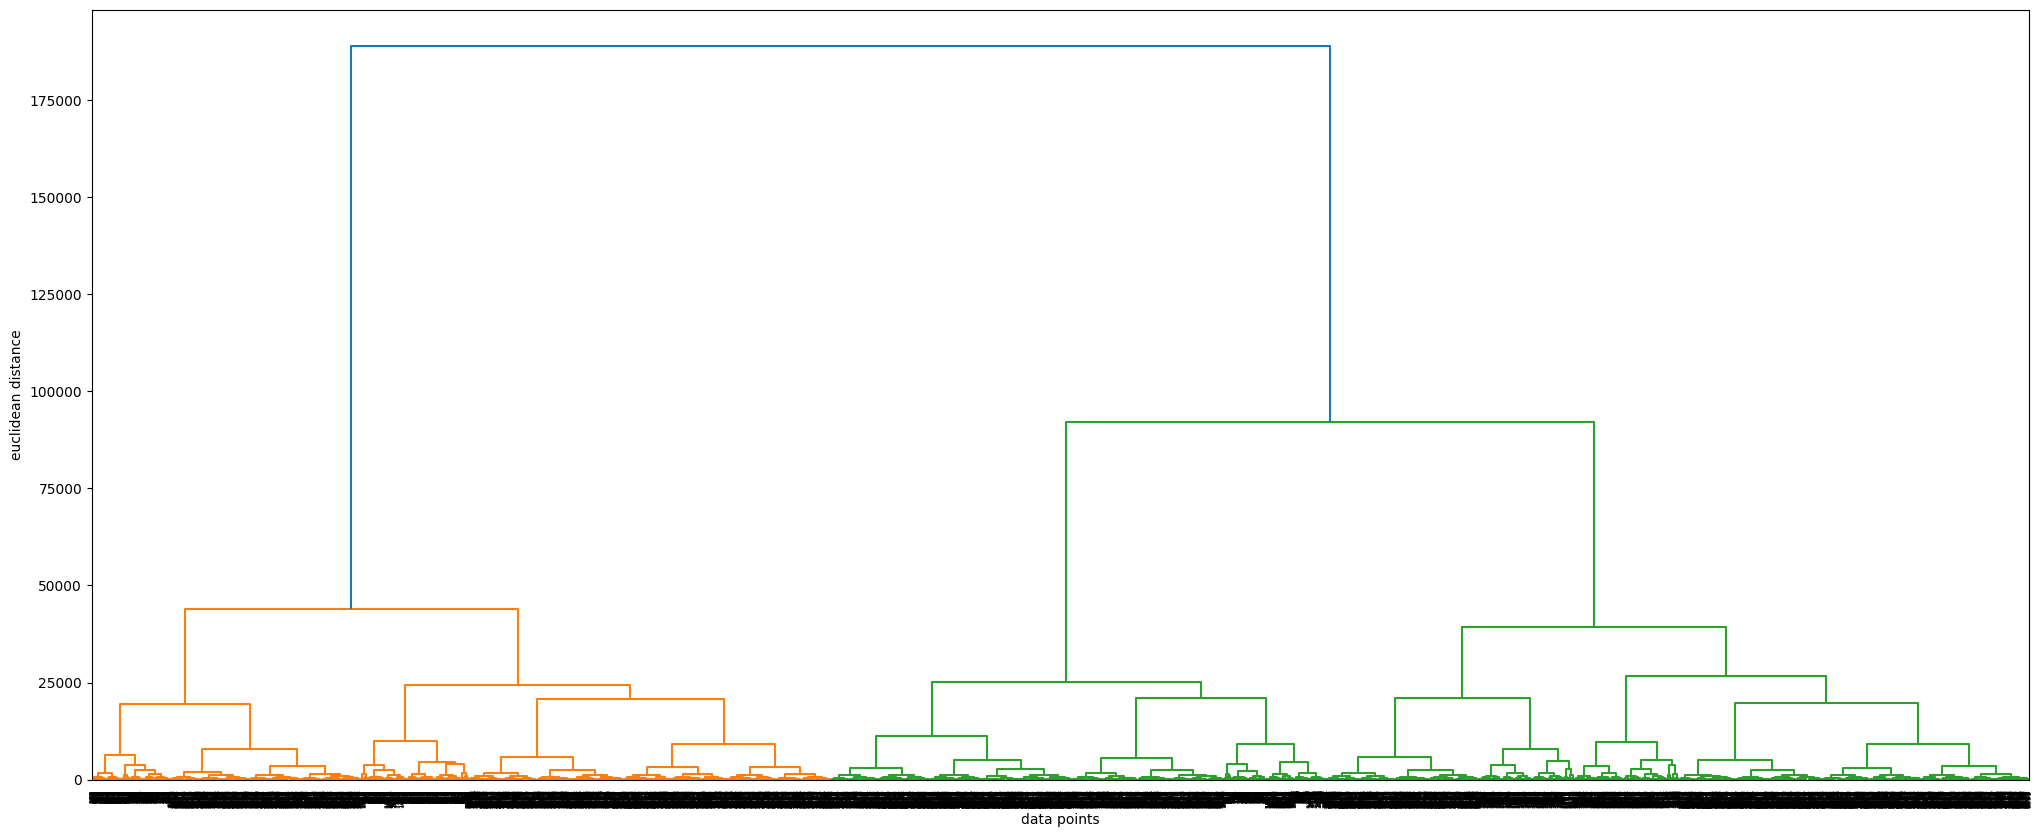

In [ ]:
#create dendogram and find the best clustering value
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(df,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

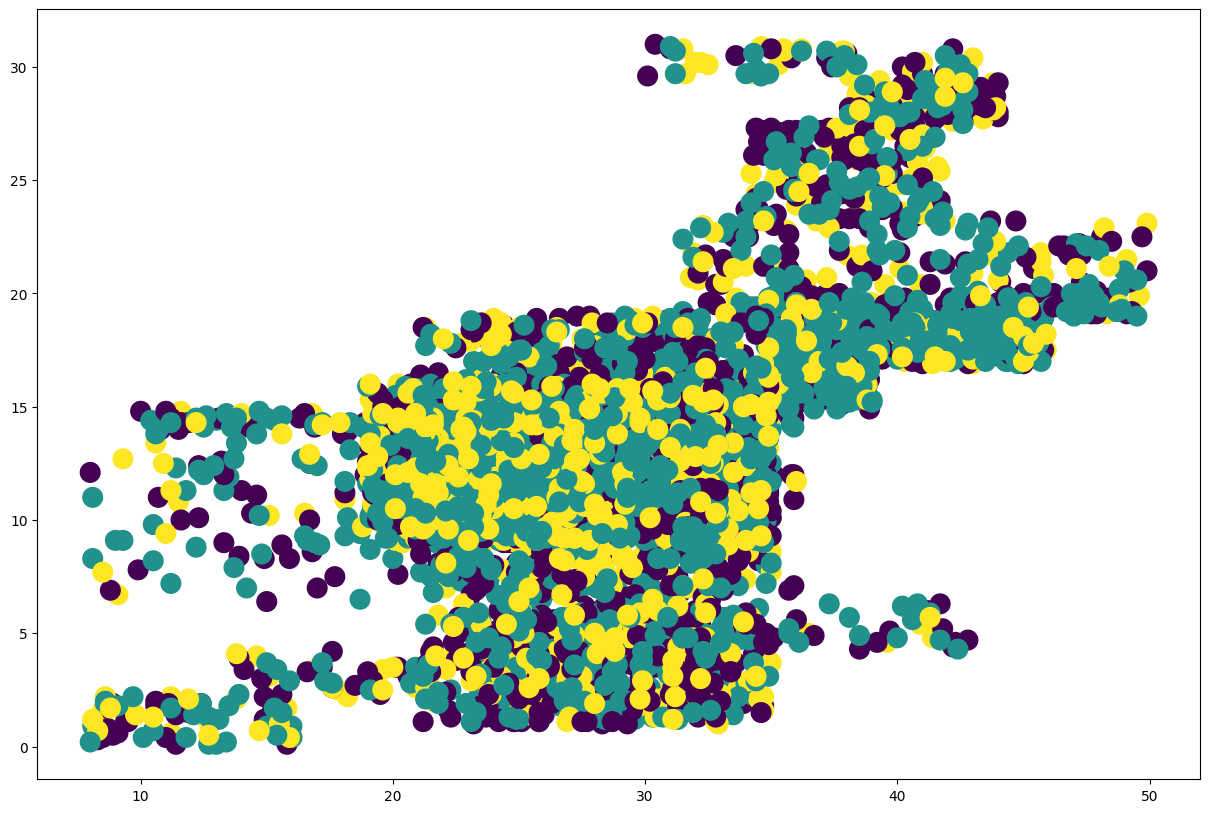

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3,affinity= "euclidean",linkage = "ward")
data_predict = hiyerartical_cluster.fit_predict(df)
plt.figure(figsize=(15,10))
plt.scatter( x = 'Cancellation % (Total)' ,y = 'Avg. ETA' , data = df , c = data_predict , s = 200 )
plt.show()

##**Implementing Logistic Regression for Prediction**


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Methods Used : Binary Logistic Regression, Multinomial Logistic Regression, Tree Based Method-(Decision Method)


3    1511
1    1467
7     856
4     746
8     718
5     471
9     382
2     216
6     185
0     168
Name: cluster_gmm, dtype: int64


Log-Likelihood: 12.510827384096212




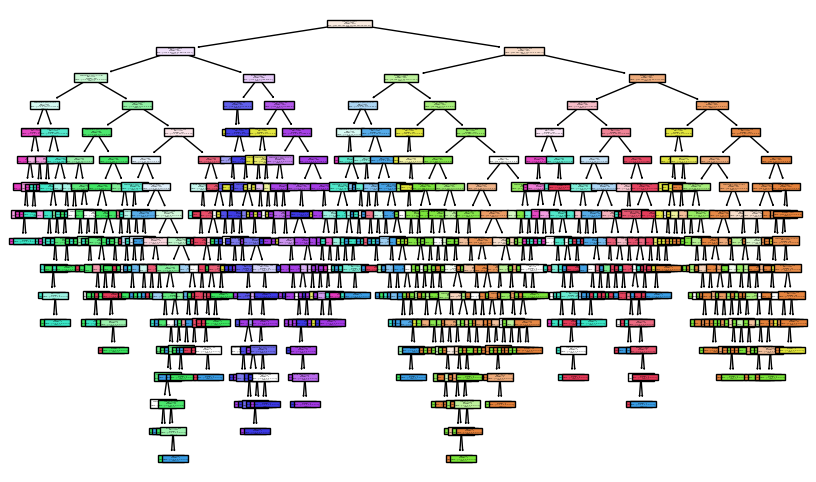

Binary Logistic Regression Coefficients:
Demand: 13.164)
Fulfilment %: 0.165)
Avg. Price: 0.141)
Avg. Trip Size: 1.798)
Cancellation % (Total): 0.057)
Driver Cancellation%: 0.022)
Customer Cancellation %: 0.062)
Avg. ETA: 0.975)

Multinomial Logistic Regression Coefficients:
Demand: 17.868, 0.422, 0.355, 2.211, 0.112, 0.120, 0.110, 1.022
Fulfilment %: 8.319, 7.935, 7.879, 4.566, 0.486, 2.417, 1.027, 1.256
Avg. Price: 2.544, 0.325, 6.427, 9.208, 2.008, 1.938, 2.031, 0.139
Avg. Trip Size: 7.894, 8.384, 7.568, 4.413, 0.474, 2.263, 0.971, 1.199
Cancellation % (Total): 6.139, 7.274, 8.721, 4.081, 0.385, 1.850, 0.801, 0.864
Driver Cancellation%: 4.979, 0.223, 11.319, 0.988, 2.786, 0.486, 3.411, 1.253
Customer Cancellation %: 4.129, 0.540, 8.637, 0.931, 2.075, 0.221, 2.389, 3.369
Avg. ETA: 7.785, 0.211, 1.321, 0.658, 0.899, 4.371, 1.881, 0.996

Binary Logistic Regression Log-Likelihood: 1.0
Multinomial Logistic Regression Log-Likelihood: 0.965922619047619


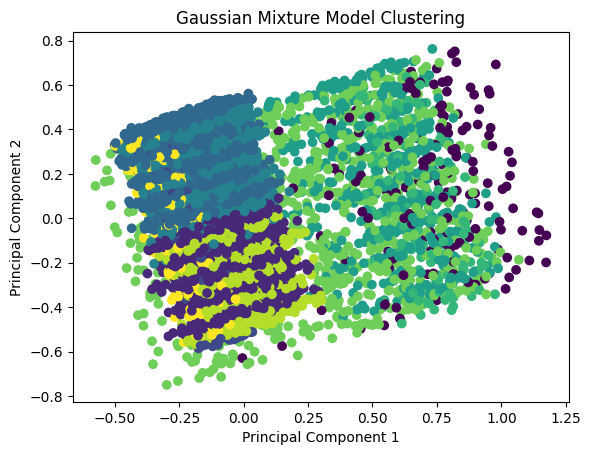

In [ ]:
print("Methods Used : Binary Logistic Regression, Multinomial Logistic Regression, Tree Based Method-(Decision Method)")
print("\n")


# Read the dataset
df = pd.read_csv("/Cab_Aggregator_Problem_Dataset.csv")


# Select relevant columns for segmentation
features = df[['Demand', 'Fulfilment %', 'Avg. Price', 'Avg. Trip Size', 'Cancellation % (Total)', 'Driver Cancellation%' ,	'Customer Cancellation %',	'Avg. ETA']]

# Preprocess the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Find the optimal number of clusters based on the elbow curve
optimal_clusters = np.argmin(wcss) + 1

# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm.fit(features_scaled)

# Perform hierarchical clustering using Ward's method
cluster_model = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
hierarchical_clusters = cluster_model.fit_predict(features_scaled)

# Build the decision tree classifier
tree = DecisionTreeClassifier()
X = features
y = hierarchical_clusters
tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, class_names=[str(i) for i in range(optimal_clusters)], filled=True)
plt.show()

# Perform binary logistic regression
binary_logreg = LogisticRegression(random_state=42)
binary_logreg.fit(features_scaled, (df['cluster_gmm'] > 0).astype(int))

# Perform multinomial logistic regression
multinomial_logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
multinomial_logreg.fit(features_scaled, df['cluster_gmm'])

# Print the coefficients of the binary logistic regression model
print("Binary Logistic Regression Coefficients:")
for feature, coef in zip(features.columns, binary_logreg.coef_[0]):
    print(f"{feature}: {abs(coef):.3f})")

# Print the coefficients of the multinomial logistic regression model
print("\nMultinomial Logistic Regression Coefficients:")
for feature, coef in zip(features.columns, multinomial_logreg.coef_):
    print(f"{feature}: {', '.join([f'{abs(c):.3f}' for c in coef])}")

# Calculate log-likelihood scores for binary and multinomial logistic regression models
binary_loglik = binary_logreg.score(features_scaled, (df['cluster_gmm'] > 0).astype(int))
multinomial_loglik = multinomial_logreg.score(features_scaled, df['cluster_gmm'])
print(f"\nBinary Logistic Regression Log-Likelihood: {binary_loglik}")
print(f"Multinomial Logistic Regression Log-Likelihood: {multinomial_loglik}")

# # Visualize the clusters
# pca = PCA(n_components=2)
# features_pca = pca.fit_transform(features_scaled)

plt.scatter(features_pca[:, 0], features_pca[:, 1], c=df['cluster_gmm'])
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Save the cluster assignments and silhouette values to a new CSV file
df.to_csv('segmented_dataset.csv', index=False)